# Problem Statement
Develop fraud detection model using historical and/or public external data.

# Questions to keep in Mind
- How to prevent fraud more effectively without creating operation overhead?
- Which transactions should we decline to reduce fraud?
- What are some key attributes that help to make the decline decision?
- How to minimize the negative impact to customer experience while preventing fraud? Can you make any long-term suggestions?
- How did you arrive at the conclusions?

## Packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Data Setup

In [2]:
# Read data
trainFileName = 'train_ScotiaDSD.csv'
testFileName = 'test_ScotiaDSD.csv'
trainData = pd.read_csv(os.path.join(os.getcwd(), trainFileName))
testData = pd.read_csv(os.path.join(os.getcwd(), testFileName))

In [3]:
# binaryColumns (not including FRAUD_FLAG), stringColumns, numericalColumns
binaryColumns = [
 'CARD_NOT_PRESENT',
 'FLAG_LX',
 'FLAG_ATM',
 'FLAG_AUTO',
 'FLAG_CASH',
 'FLAG_LS',
 'FLAG_DISCOUNT',
 'FLAG_RECREA',
 'FLAG_ELCTRNCS',
 'FLAG_REG_AMT',
 'FLAG_FASTFOOD',
 'FLAG_GAS',
 'FLAG_HIGH_AMT',
 'FLAG_HIGH_RECREA',
 'FLAG_INTERNET',
 'FLAG_INTERNATIONAL',
 'FLAG_JEWELRY',
 'FLAG_LOW_AMT',
 'FLAG_MANUAL_ENTRY',
 'FLAG_PHONE_ORDER',
 'FLAG_PURCHASE_EXCLUDING_GAS',
 'FLAG_PLANNED',
 'FLAG_RISKY',
 'FLAG_SWIPE',
 'FLAG_TRAVEL_ONLY',
 'FLAG_TRAVEL_AND_ENTERTAINMENT',
 'FLAG_WEEKEND']

stringColumns = ['TRANSACTION_ID',
'USER_AGENT',
'CITY',
'EVENT_TIME']

numericalColumns = ['EVENT_MONTH',
 'EVENT_DAY_OF_WEEK',
 'AVAIL_CRDT',
 'AMOUNT',
 'CREDIT_LIMIT',
 'MEAN_AUTO_PAST_7DAY',
 'MEAN_LS_PAST_7DAY',
 'MEAN_RECREA_PAST_7DAY',
 'MEAN_REG_AMT_PAST_7DAY',
 'MEAN_FASTFOOD_PAST_7DAY',
 'MEAN_HIGH_AMT_PAST_7DAY',
 'MEAN_HIGH_RECREA_PAST_7DAY',
 'MEAN_INTERNET_PAST_7DAY',
 'MEAN_INTERNATIONAL_PAST_7DAY',
 'MEAN_JEWELRY_PAST_7DAY',
 'MEAN_LOW_AMT_PAST_7DAY',
 'MEAN_MANUAL_ENTRY_PAST_7DAY',
 'MEAN_PHONE_ORDER_PAST_7DAY',
 'MEAN_PLANNED_PAST_7DAY',
 'MEAN_SWIPE_PAST_7DAY',
 'MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'MEAN_WEEKEND_PAST_7DAY',
 'MAX_CASH_PAST_7DAY',
 'MAX_LS_PAST_7DAY',
 'MAX_RECREA_PAST_7DAY',
 'MAX_HIGH_AMT_PAST_7DAY',
 'MAX_HIGH_RECREA_PAST_7DAY',
 'MAX_INTERNET_PAST_7DAY',
 'MAX_PHONE_ORDER_PAST_7DAY',
 'MAX_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'MAX_SWIPE_PAST_7DAY',
 'MAX_WEEKEND_PAST_7DAY',
 'STD_LX_PAST_7DAY',
 'STD_FASTFOOD_PAST_7DAY',
 'STD_HIGH_AMT_PAST_7DAY',
 'STD_INTERNET_PAST_7DAY',
 'STD_LOW_AMT_PAST_7DAY',
 'STD_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'STD_SWIPE_PAST_7DAY',
 'STD_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'SUM_LX_PAST_7DAY',
 'SUM_AUTO_PAST_7DAY',
 'SUM_LS_PAST_7DAY',
 'SUM_RECREA_PAST_7DAY',
 'SUM_GAS_PAST_7DAY',
 'SUM_HIGH_AMT_PAST_7DAY',
 'SUM_INTERNET_PAST_7DAY',
 'SUM_INTERNATIONAL_PAST_7DAY',
 'SUM_LOW_AMT_PAST_7DAY',
 'SUM_MANUAL_ENTRY_PAST_7DAY',
 'SUM_PHONE_ORDER_PAST_7DAY',
 'SUM_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'SUM_PARTIAL_PAST_7DAY',
 'SUM_PLANNED_PAST_7DAY',
 'SUM_SWIPE_PAST_7DAY',
 'SUM_WEEKEND_PAST_7DAY',
 'COUNT_AUTO_PAST_7DAY',
 'COUNT_ELCTRNCS_PAST_7DAY',
 'COUNT_GAS_PAST_7DAY',
 'COUNT_HIGH_AMT_PAST_7DAY',
 'COUNT_INTERNET_PAST_7DAY',
 'COUNT_LOW_AMT_PAST_7DAY',
 'COUNT_MANUAL_ENTRY_PAST_7DAY',
 'COUNT_PHONE_ORDER_PAST_7DAY',
 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_7DAY',
 'COUNT_SWIPE_PAST_7DAY',
 'COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_7DAY',
 'COUNT_WEEKEND_PAST_7DAY',
 'MEAN_AUTO_PAST_30DAY',
 'MEAN_DISCOUNT_PAST_30DAY',
 'MEAN_RECREA_PAST_30DAY',
 'MEAN_ELCTRNCS_PAST_30DAY',
 'MEAN_REG_AMT_PAST_30DAY',
 'MEAN_HIGH_AMT_PAST_30DAY',
 'MEAN_INTERNET_PAST_30DAY',
 'MEAN_LOW_AMT_PAST_30DAY',
 'MEAN_MANUAL_ENTRY_PAST_30DAY',
 'MEAN_PHONE_ORDER_PAST_30DAY',
 'MEAN_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'MEAN_PLANNED_PAST_30DAY',
 'MEAN_SWIPE_PAST_30DAY',
 'MEAN_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'MEAN_WEEKEND_PAST_30DAY',
 'MAX_AUTO_PAST_30DAY',
 'MAX_LS_PAST_30DAY',
 'MAX_ELCTRNCS_PAST_30DAY',
 'MAX_FASTFOOD_PAST_30DAY',
 'MAX_HIGH_RECREA_PAST_30DAY',
 'MAX_MANUAL_ENTRY_PAST_30DAY',
 'MAX_PHONE_ORDER_PAST_30DAY',
 'MAX_PARTIAL_PAST_30DAY',
 'MAX_RISKY_PAST_30DAY',
 'MAX_WEEKEND_PAST_30DAY',
 'STD_AUTO_PAST_30DAY',
 'STD_LS_PAST_30DAY',
 'STD_RECREA_PAST_30DAY',
 'STD_ELCTRNCS_PAST_30DAY',
 'STD_REG_AMT_PAST_30DAY',
 'STD_HIGH_RECREA_PAST_30DAY',
 'STD_INTERNET_PAST_30DAY',
 'STD_LOW_AMT_PAST_30DAY',
 'STD_MANUAL_ENTRY_PAST_30DAY',
 'STD_PHONE_ORDER_PAST_30DAY',
 'STD_PARTIAL_PAST_30DAY',
 'STD_SWIPE_PAST_30DAY',
 'STD_TRAVEL_ONLY_PAST_30DAY',
 'STD_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'SUM_AUTO_PAST_30DAY',
 'SUM_LS_PAST_30DAY',
 'SUM_DISCOUNT_PAST_30DAY',
 'SUM_RECREA_PAST_30DAY',
 'SUM_ELCTRNCS_PAST_30DAY',
 'SUM_REG_AMT_PAST_30DAY',
 'SUM_FASTFOOD_PAST_30DAY',
 'SUM_GAS_PAST_30DAY',
 'SUM_HIGH_AMT_PAST_30DAY',
 'SUM_HIGH_RECREA_PAST_30DAY',
 'SUM_INTERNET_PAST_30DAY',
 'SUM_INTERNATIONAL_PAST_30DAY',
 'SUM_LOW_AMT_PAST_30DAY',
 'SUM_MANUAL_ENTRY_PAST_30DAY',
 'SUM_PHONE_ORDER_PAST_30DAY',
 'SUM_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'SUM_SWIPE_PAST_30DAY',
 'SUM_TRAVEL_ONLY_PAST_30DAY',
 'SUM_WEEKEND_PAST_30DAY',
 'COUNT_AUTO_PAST_30DAY',
 'COUNT_RECREA_PAST_30DAY',
 'COUNT_REG_AMT_PAST_30DAY',
 'COUNT_FASTFOOD_PAST_30DAY',
 'COUNT_GAS_PAST_30DAY',
 'COUNT_HIGH_AMT_PAST_30DAY',
 'COUNT_INTERNET_PAST_30DAY',
 'COUNT_LOW_AMT_PAST_30DAY',
 'COUNT_MANUAL_ENTRY_PAST_30DAY',
 'COUNT_PHONE_ORDER_PAST_30DAY',
 'COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY',
 'COUNT_PLANNED_PAST_30DAY',
 'COUNT_SWIPE_PAST_30DAY',
 'COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY',
 'COUNT_WEEKEND_PAST_30DAY',
 'PREV_M_INFLATION',
 'PREV_M_UNEMP_RATE']

# Data Analysis

### Takeaway
After having a deep-dive into the dataset, the follwoing conclusions can be made:
- there are three distinct data types:
    - float (numerical)
    - int (binary)
    - object (string)
- the magnitude of the variables differ greatly
- imbalance of target data (97.5% to 2.5%)

In [4]:
trainData.describe()

,EVENT_MONTH,EVENT_DAY_OF_WEEK,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,CREDIT_LIMIT,CARD_NOT_PRESENT,FLAG_LX,FLAG_ATM,FLAG_AUTO,...,COUNT_LOW_AMT_PAST_30DAY,COUNT_MANUAL_ENTRY_PAST_30DAY,COUNT_PHONE_ORDER_PAST_30DAY,COUNT_PURCHASE_EXCLUDING_GAS_PAST_30DAY,COUNT_PLANNED_PAST_30DAY,COUNT_SWIPE_PAST_30DAY,COUNT_TRAVEL_AND_ENTERTAINMENT_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,PREV_M_INFLATION,PREV_M_UNEMP_RATE
count,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,...,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000,89230.000000
mean,4.487493,2.993791,0.024140,11819.459858,93.386145,16576.920318,0.264317,0.043024,0.004147,0.041275,...,12.501020,4.262468,42.090362,38.235392,4.040278,32.719825,1.149277,10.510210,1.287065,5.770069
std,1.597642,2.041146,0.153484,8715.253413,458.370129,9661.638210,0.440971,0.202911,0.064261,0.198927,...,18.519009,13.875710,37.543140,35.567226,5.273881,29.376354,2.851119,10.613765,0.208626,0.077091
min,2.000000,0.000000,0.000000,0.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,5.700000
25%,3.000000,1.000000,0.000000,4099.880000,8.200000,9200.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,13.000000,11.000000,0.000000,8.000000,0.000000,2.000000,1.100000,5.700000
50%,5.000000,3.000000,0.000000,11306.770000,26.320000,17500.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,2.000000,36.000000,32.000000,2.000000,27.000000,0.000000,8.000000,1.200000,5.800000
75%,6.000000,5.000000,0.000000,17877.600000,67.280000,22500.000000,1.000000,0.000000,0.000000,0.000000,...,17.000000,5.000000,62.000000,56.000000,6.000000,50.000000,1.000000,16.000000,1.500000,5.800000
max,7.000000,6.000000,1.000000,96108.100000,73126.950000,102500.000000,1.000000,1.000000,1.000000,1.000000,...,944.000000,645.000000,968.000000,968.000000,146.000000,278.000000,83.000000,290.000000,1.600000,5.900000


In [5]:
# No duplicated data
trainData.duplicated().sum()

0

In [6]:
len(trainData.columns) == len(np.unique(trainData.columns))

True

In [7]:
trainData['FRAUD_FLAG'].value_counts(normalize=True)

0.0    0.97586
1.0    0.02414
Name: FRAUD_FLAG, dtype: float64

In [8]:
dataMissing = trainData.isna().sum(axis=0)
dataMissing[dataMissing != 0]

USER_AGENT    77322
CITY          77322
dtype: int64

In [9]:
# Disparity between the magnitude of the numerical values
trainData[numericalColumns].to_numpy().max(), trainData[numericalColumns].to_numpy().min()

(395008.35, 0.0)

In [10]:
yTrain = trainData['FRAUD_FLAG']
xTrain = trainData.drop(['FRAUD_FLAG'], axis = 1)

## Data Pre-processing

In [11]:
def data_preprocessing(data):
    """ Pre-process the data.
            - convert dtypes
            - change units to something more useful

    Args:
        data (DataFrame): pandas DataFrame

    Returns:
        DataFrame: same pandas Dataframe but preprocessed
    """
    # Convert binary variables into 0,1 integers
    test = []
    for column in data:

        if len(data[column].unique()) == 2:
            data[column] = data[column].astype(int)
        elif (data[column].dtype == 'int64') or data[column].dtype == 'float64':
            test.append(column)

    # Convert EVENT_TIME into seconds to be useful
    data['EVENT_TIME'] = data['EVENT_TIME'].apply(lambda x: x[:-1] if x[-1] == ':' else x)
    dateTransactionTime = pd.DataFrame(data['EVENT_TIME'].str.split(r':').to_list(), columns=['hour', 'minutes'])
    dateTransactionTime = dateTransactionTime.astype('int')

    dataTransactionTimeSeconds = dateTransactionTime['hour'] * 60 * 60 + dateTransactionTime['minutes'] * 60
    dataTransactionTimeSeconds
    
    # Drop the useless columns now
    data = data.drop(stringColumns, axis = 1)
    data['EVENT_TIME_IN_SECONDS'] = dataTransactionTimeSeconds
    
    return data

In [12]:
xTrain = data_preprocessing(xTrain)

numericalColumns.append('EVENT_TIME_IN_SECONDS')

### Normalize the data first:
- target only the continuous variables

In [13]:
# Normalize features to keep values in the same scale and improve accuracy/stabilize  models
from sklearn.preprocessing import StandardScaler

def normalize(data, normalizerObject):
    """Normalize the data depending on the choice of normalizerObjecvt.

    Args:
        data (DataFrame): pandas DataFrame
        normalizerObject (sklearn type of normalizer): ex) StandardScaler

    Returns:
        DataFrame: normalized data
        Normalizer Object: fitted normalizer
    """
    sc = normalizerObject()
    xTrainNumericalNormalized = pd.DataFrame(sc.fit_transform(xTrain[numericalColumns]), columns = xTrain[numericalColumns].columns)
    
    return xTrainNumericalNormalized, sc

In [14]:
xTrainNumericalNormalized, sc = normalize(xTrain, StandardScaler)

xTrainNormalized = pd.concat([xTrainNumericalNormalized, xTrain[binaryColumns]], axis = 1)

## Feature Selection
- Low Variance
- Univariate Statistical Methods
    - SelectKBest
- Recursive Feature Elimination
- Coefficient of Variation?

### Low Variance Removal:

#### Description:
"Features with a training-set variance lower than this threshold will be removed"

ex) For Bernoulli random variables:

$$Var(X) = p(1-p)$$

Removing Bernoulli random variables that appear in more than 80% of samples means having a threshold value of:

$$Threshold = 0.8(1-0.8)$$

In [15]:
from sklearn.feature_selection import VarianceThreshold

# cannot used normalized numerical dataset bc standardized to 1 std...

def varianceThresholdFeatureSelection(data, threshold):
    """ Feature Selection method: remove the variables whose variance is greater than a given threshold.

    Args:
        data (DataFrame): pandas DataFrame
        threshold (float): the maximum allowed variance value

    Returns:
        (DataFrame): data with useful features
        (Feature Selection Object): fitted object
        (list): column names of usefulf eatures
    """
    vt = VarianceThreshold(threshold)
    dataTransformed = vt.fit_transform(data)
    vtColumns = vt.get_feature_names_out().tolist()

    return dataTransformed, vt, vtColumns

In [16]:
dataBinaryTransformed, vtBinary, vtBinaryColumns = varianceThresholdFeatureSelection(xTrainNormalized[binaryColumns], threshold = 0.8*(1-0.8))

xTrainVT = xTrainNormalized[numericalColumns + vtBinaryColumns]

### Correlation between predictor and target

In [17]:
import seaborn as sns

# def correlationMatrixFeatureSelection(data, threshold):
#     """ Choose features that have correlation greater than threshold.

#     Args:
#         data (DataFrame): pandas DataFrame
#         threshold (float): the minimum allowed correlation value

#     Returns:
#         (DataFrame): data with useful features
#         (DataFrame): Correlation Matrix
#         (list): column names of usefulf eatures
#     """
#     corr = data.corr()
#     # # plot the heatmap
#     # sns.heatmap(corr, 
#     #         xticklabels=corr.columns,
#     #         yticklabels=corr.columns)
#     maskCorr = (corr != 1) & (corr >= threshold)

#     importantNumericalColumns = data.columns[np.unique(np.where(maskCorr)[0])].tolist()
    
#     return data[importantNumericalColumns], corr, importantNumericalColumns


def correlationMatrixPredictorVsTarget(X, y, absoluteThreshold):
    corr_list = []
    for col in X:
        corr_list.append(np.corrcoef(X[col], y)[0,1])
    corr_list.sort()
    
    fig,ax=plt.subplots(figsize=(32,20))
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(10)

    ax.barh(X.columns,corr_list)
    plt.grid(True)
    
    
    corrArray = np.array(corr_list)
    corrMask = np.abs(corrArray) >= absoluteThreshold
    sufficientCorrColumns = np.array(X.columns)[np.where(corrMask)[0]]
    
    return X[sufficientCorrColumns], sufficientCorrColumns

In [18]:
# xTrainNumericalCorr, xTrainNumericalCorrMatrix, xTrainNumericalCorrColumns = correlationMatrixFeatureSelection(xTrainNormalized[numericalColumns], threshold = 0.8)

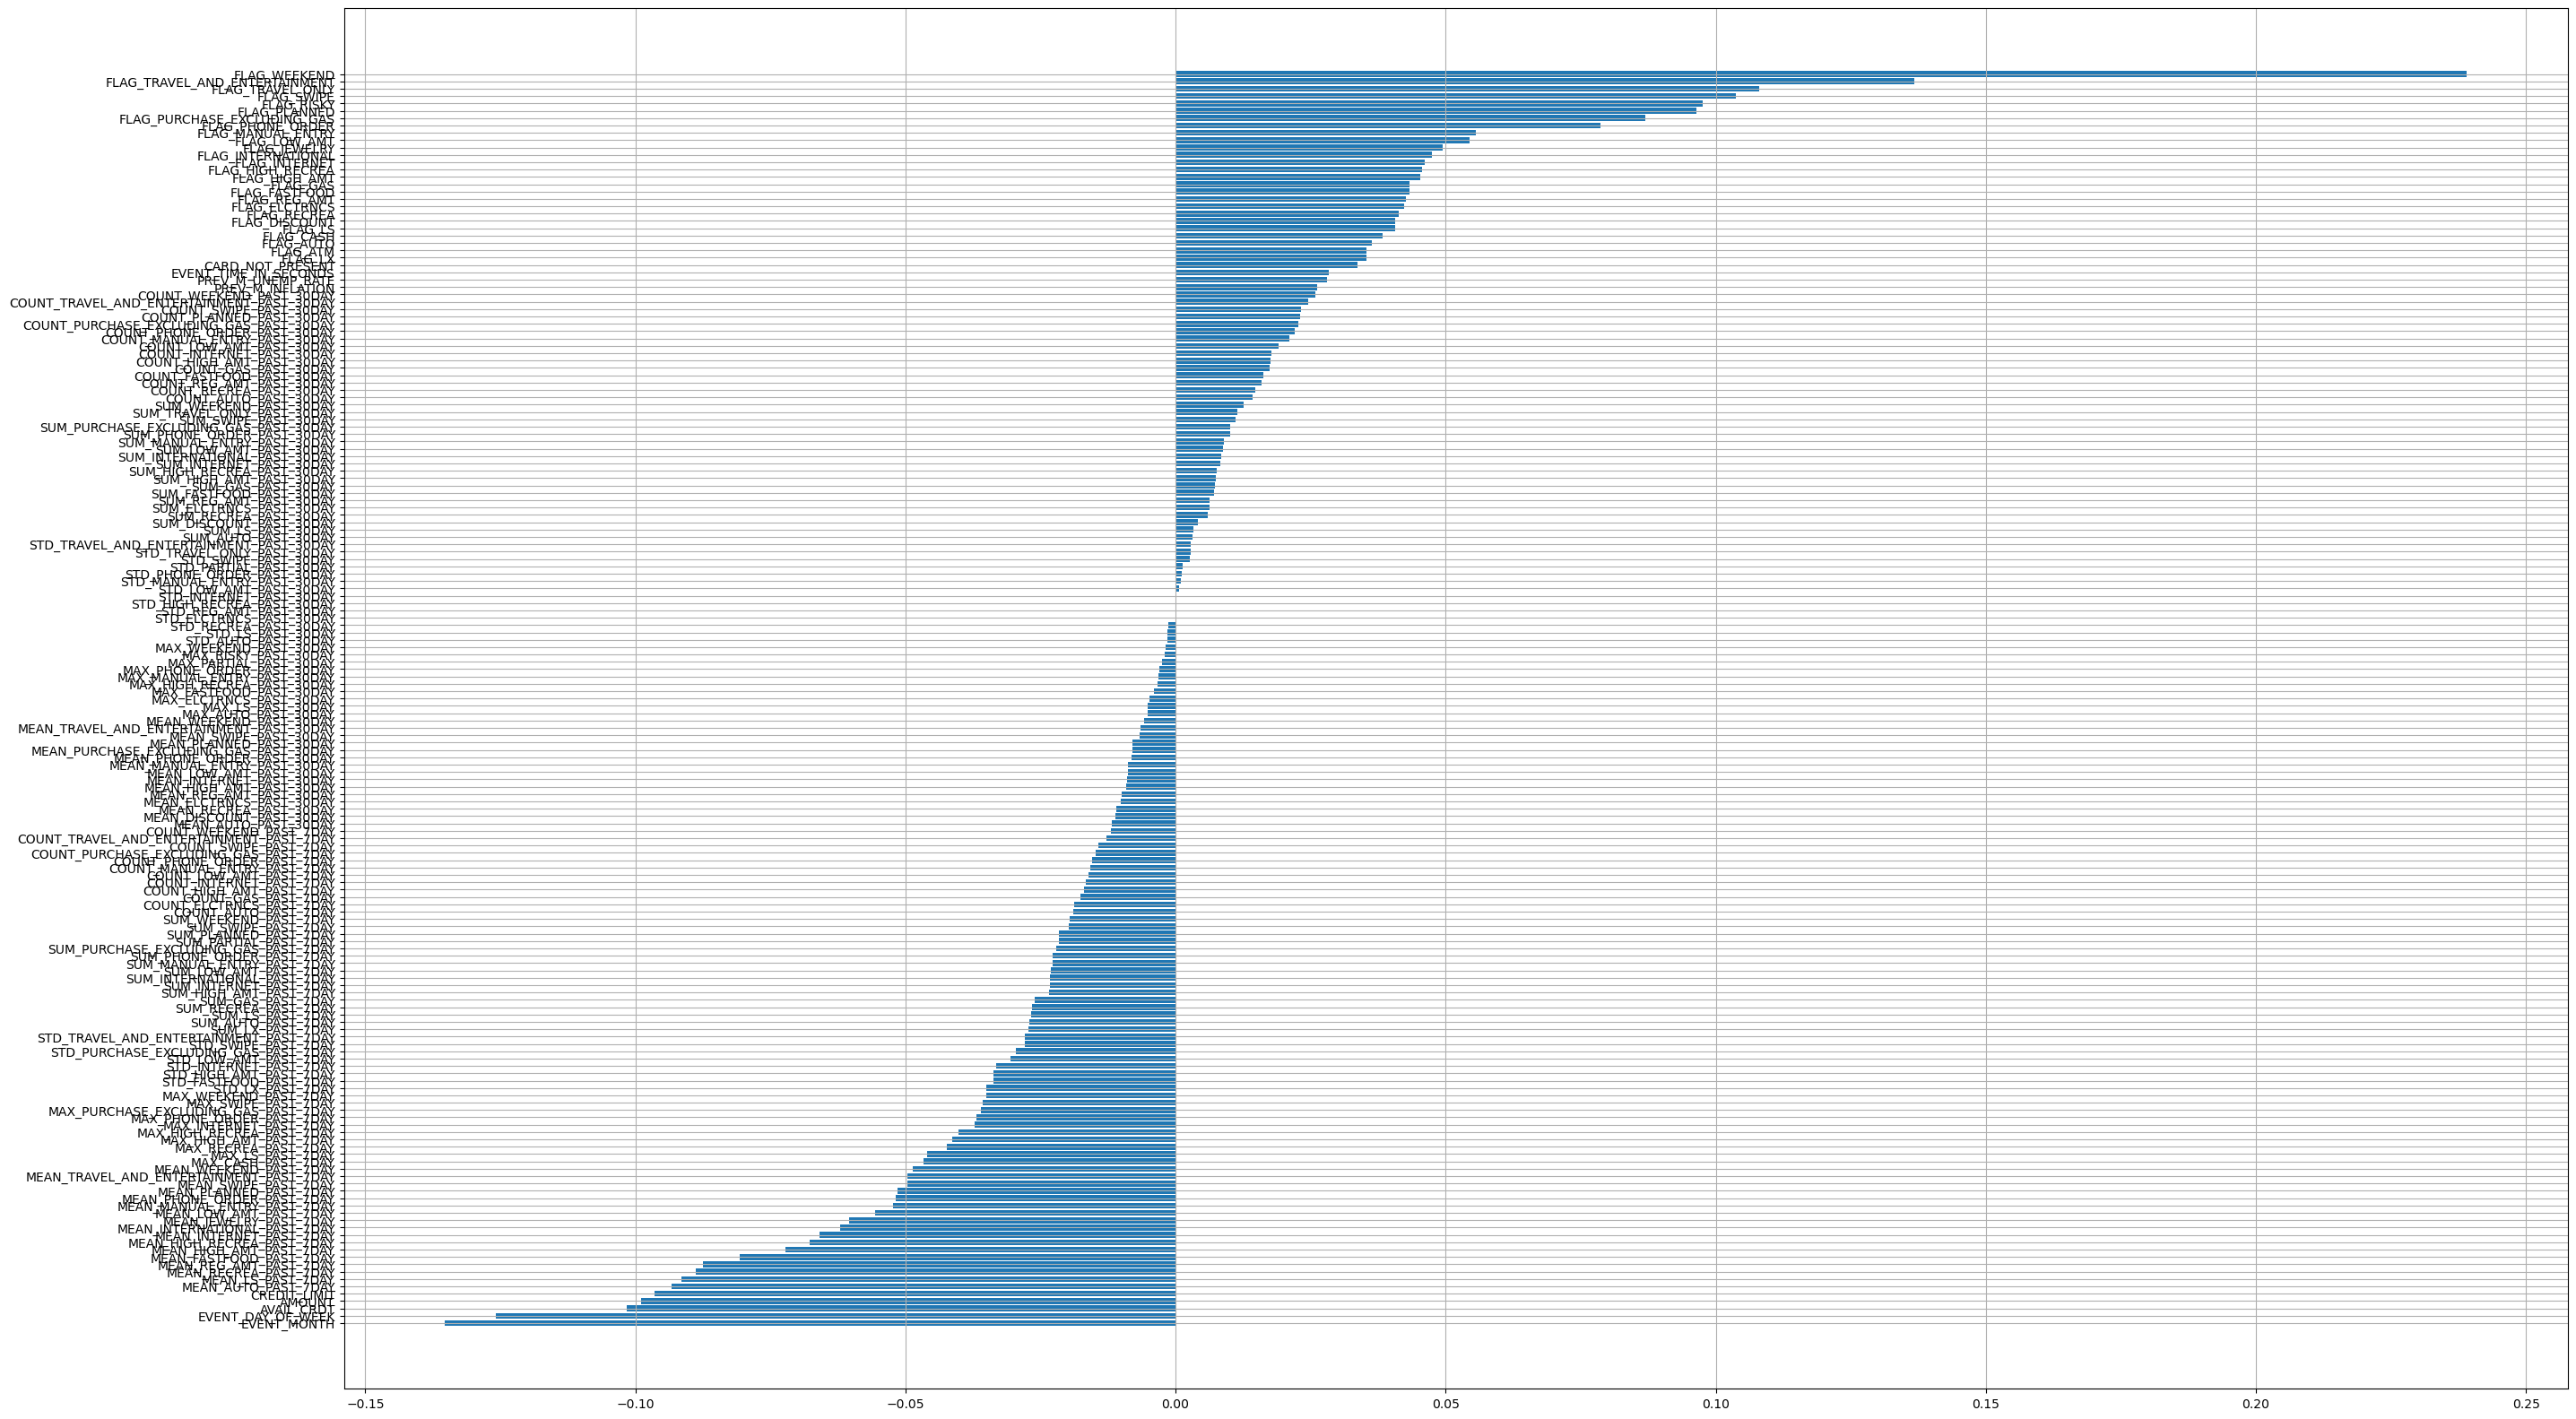

In [19]:
xSufficientCorr, sufficientCorrColumns = correlationMatrixPredictorVsTarget(xTrainNormalized, yTrain, absoluteThreshold=0)

### Select K best:

#### Description:
Apply a chisquared test to the predictor and the target value. We then take the top $k$ predictors with the highest score (lowest p-value for chisquared test).

A low p-value would represent a dependence between the target and feature.

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

def selectKBestFeatureSelection(data, y, k):
    """ Using chisquared test with each predictor and target, determine which features are dependent.

    Args:
        data (DataFrame): pandas DataFrame of predictors
        y (Series): target values
        k (int): number of features to pick

    Returns:
        (DataFrame): transformed data
        (Selector Object): 
        (list): column names of usefulf eatures

    """
    print(f"Number of Features (BEFORE): {data.shape[1]}")
    skb = SelectKBest(score_func=chi2, k=k)
    dataTransformed = skb.fit_transform(data, y)

    skbColumns = list(skb.get_feature_names_out())
    dataTransformed = pd.DataFrame(dataTransformed, columns=skbColumns)    
    print(f"Number of Features (AFTER): {len(skbColumns)}")
    return dataTransformed, skb, skbColumns

#TODO: Potentially add case where you can add a threshold value as well

In [21]:
# Categorical only?
xTrainSKB, skb, skbColumns = selectKBestFeatureSelection(xTrain, yTrain, k=70)

Number of Features (BEFORE): 171
Number of Features (AFTER): 70


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
#F1 = 2 * (precision * recall) / (precision + recall)
# percision_score =  tp / (tp + fp)
# recall_score = tp / (tp + fn)
#
# fn = model guessed fraud when it is NOT fraud
# fp = model guessed NOT fraud when it is fraud

def evaluate(model, y_true, y_pred):
    # C_(i,j) = group i predicted to be in group j
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    percision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"F1 Score: {f1:.4f}")
    print(f"Percision: {percision:.4f}")
    print(f"Recall: {recall:.4f}")
    # print(f"Confusion Matrix: \n {cm}")
    plt.figure(figsize=(4,4))
    plt.title('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='.5g')
    return cm, f1, percision, recall
    

# Data Sampling
- SMOTE (Synthetic Minority Over-Sampling Technique)
- Oversampling
- Bootstrapping

1. use `train_test_split`
2. k-fold cross validation on the dataset from above
3. use all fraud cases, and split non-fraud cases by `n`.

For $1 \leq i \leq n$, we want to train using $r$ (all fraud cases in dataset) and $s_i$ ($i$ th sample for the dataset of non-fraud cases). In total having $n$ models, and then do majority vote?

In [24]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

def data_splitting(X, y, randomState, testSize, splitType="basic"):
    if splitType == "basic":
        xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=randomState, test_size=testSize)
    elif splitType == "over_sample":
        #Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.
        print("Begin Oversampling...")
        ros = RandomOverSampler()
        xOverSample, yOverSample = ros.fit_resample(X, y)
        print(f"Original data shape: {X.shape}")
        print(f"New  data shape: {xOverSample.shape}")
        xTrain, xTest, yTrain, yTest = train_test_split(xOverSample, yOverSample, random_state=randomState, test_size=testSize)
    elif splitType == "SMOTE":
        over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
        xOverSample, yOverSample = over.fit_resample(X, y)
        print(f"Original data shape: {X.shape}")
        print(f"New  data shape: {xOverSample.shape}")
    elif splitType == "under and over":
        under = RandomUnderSampler()
        over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
                
        
    return xTrain, xTest, yTrain, yTest

In [28]:
# DEBUG
#oversample the minority class to have 10 percent the number of examples of the majority class
over = SMOTE(sampling_strategy=0.1, k_neighbors=5)
xOverSample, yOverSample = over.fit_resample(xTrain, yTrain)
print(f"Original data shape: {yTrain.shape}")
print(f"New  data shape: {yOverSample.shape}")

Original data shape: (89230,)
New  data shape: (95783,)


In [27]:
np.sum(yTrain == 0)

87076

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# Repeats Stratified K-Fold n times with different randomization in each repetition.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(LogisticRegression(), xTrain, yTrain, scoring='roc_auc', cv=cv, n_jobs=-1)

# Model
- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

def modeling(X, y, baseModel, randomState, testSize, splitType):
    # Define the base model
    model = baseModel(random_state=0)
    # Train/Test Split
    xTrain, xTest, yTrain, yTest = data_splitting(X, y, randomState, testSize, splitType=splitType)
    # Fit the model
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    
    # Evaluation
    cm, f1, percision, recall = evaluate(model, yTest, yPred)
    
    return cm, f1, percision, recall


In [ ]:
cm, f1, percision, recall = modeling(xSufficientCorr, yTrain, LogisticRegression, randomState=0, testSize=0.2, splitType='over_sample')

In [ ]:
from sklearn.feature_selection import RFE


xTrainLR, xTestLR, yTrainLR, yTestLR = train_test_split(xTrainNormalized, yTrain, test_size = 0.2)

clf = LogisticRegression(random_state=0)
# clf.fit(xTrainLR, yTrainLR)
# yPredLR = clf.predict(xTestLR)
# cm, f1, percision, recall = evaluate(clf, yTestLR, yPredLR)

In [ ]:
selector = RFE(clf, n_features_to_select=30, step=1)
selector = selector.fit(xTrainLR, yTrainLR)

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(xTrainLR[selector.get_feature_names_out()], yTrainLR)

yPredLR = clf.predict(xTestLR[selector.get_feature_names_out()])

cm, f1, percision, recall = evaluate(clf, yTestLR, yPredLR)

# Hyperparameter Tuning